
# Investigate TMDb Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction

> In this dataset of TMDB movies there are around 10000 movies that has been recorded from the TMDB movie database which inlcudes the movies budget, popularity and revenue. From this dataset I will be observing and carrying out an investigation to find any errors or any patterns.
>
## Dataset
#### TMDB Movie Dataset
#### Total Rows = 10865/ Total Columns = 21

## Questions
>Question 1 - Which is the most popular Genre?
>
>Question 2 - Which is the most rated genre?
>
>Question 3 - What is the relationship between Voting Average and Runetime?
>
>Question 4 - Which director has the most revenue?
>
>Question 5 - Which actor has the most revenue?
>
>Question 6 - Which Genre had the highest release in movies?

In [564]:
# Use this cell to set up import statements for all of the packages that you
# plan to use.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pl

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [565]:
# print dataset to give us a view of what the dataset includes
df_movie = pd.read_csv('tmdb-movies.csv')
df_movie.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [566]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

## Data Cleaning

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Filling in null values

In [567]:
df_movie.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [568]:
# After reviewing the dataset 3 columns have '0' as the value that is missing within the budget and revenue column.

In [569]:
# Runtime average'

df_movie['runtime'].mean()

102.07086324314375

In [570]:
df_movie['runtime'] = df_movie['runtime'].replace(102.07086324314375)

In [571]:
# Budget average'

df_movie['budget_adj'].mean()

17551039.822886847

In [572]:
# Adding the mean with the current value of budget,

df_movie['budget_adj'] = df_movie['budget_adj'].replace(0, 17551039.822886847)

In [573]:
# Revenue average; 

df_movie['revenue_adj'].mean()

51364363.25325093

In [574]:
# Adding the mean with the current value of revenue,

df_movie['revenue_adj'] = df_movie['revenue_adj'].replace(0, 51364363.25325093)

In [575]:
# Adding the mean to the current values of Revenue and Budget value;

df_movie['revenue'] =  df_movie['revenue_adj']

In [576]:
df_movie.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,7.980243e+07,102.070863,217.389748,5.974922,2001.322658,2.675136e+07,7.980243e+07
std,92130.136561,1.000185,3.091321e+07,1.365610e+08,31.381405,575.619058,0.935142,12.812941,3.050850e+07,1.365610e+08
min,5.000000,0.000065,0.000000e+00,2.370705e+00,0.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10596.250000,0.207583,0.000000e+00,5.136436e+07,90.000000,17.000000,5.400000,1995.000000,1.755104e+07,5.136436e+07
50%,20669.000000,0.383856,0.000000e+00,5.136436e+07,99.000000,38.000000,6.000000,2006.000000,1.755104e+07,5.136436e+07
75%,75610.000000,0.713817,1.500000e+07,5.136436e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,5.136436e+07
max,417859.000000,32.985763,4.250000e+08,2.827124e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [577]:
# Remove the irrelevant value within the dataset. i.e. cast, genre and director.
df_movie.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [578]:
# Removed the missing values; genres, cast and director.
df_movie.dropna(subset=['genres', 'cast', 'director' ], inplace=True) 
df_movie.isnull().sum()

id                         0
imdb_id                    5
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       0
homepage                7839
director                   0
tagline                 2730
keywords                1425
overview                   2
runtime                    0
genres                     0
production_companies     959
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

## Splitting Columns

In [579]:
# Using the split function to split all genres as the columns contain are separated (' | ').
df_movie['genres'] = df_movie['genres'].apply(lambda x: x.split("|")[0])

In [580]:
df_movie.genres.unique()

array(['Action', 'Adventure', 'Western', 'Science Fiction', 'Drama',
       'Family', 'Comedy', 'Crime', 'Romance', 'War', 'Mystery',
       'Thriller', 'Fantasy', 'History', 'Animation', 'Horror', 'Music',
       'Documentary', 'TV Movie', 'Foreign'], dtype=object)

In [581]:
# Using the split function to split all cast. (' | ').
df_movie['cast'] = df_movie['cast'].apply(lambda x: x.split("|")[0])

In [582]:
df_movie.cast.unique()

array(['Chris Pratt', 'Tom Hardy', 'Shailene Woodley', ...,
       'Innokentiy Smoktunovskiy', 'Tatsuya Mihashi', 'Harold P. Warren'],
      dtype=object)

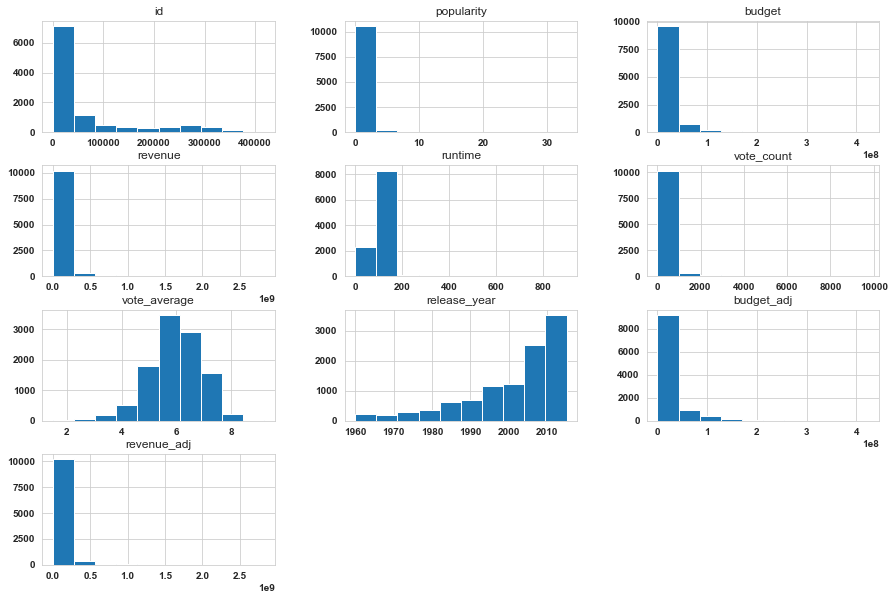

In [583]:
#A visual presentation (histogram) of the dataset.

df_movie.hist(figsize=(15,10));

In [584]:
# After discussing the structure of the data and any problems that need to be
# cleaned, perform those cleaning steps in the second part of this section.

### Finding and removing any duplicated rows

In [585]:
# Calculates any duplicate information from the dataset.
sum(df_movie.duplicated())

1

In [586]:
# Removing the duplicated rows
df_movie.drop_duplicates(inplace=True)
df_movie.shape

(10731, 21)

### Converting Release Date into Date Format

In [587]:
#the current dataset given is in a string format and is going to be changed into a datetime format.

df_movie['release_date'] = pd.to_datetime(df_movie['release_date'])
df_movie['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

### Dropping irrelevant Columns & Rows that is not needed within this analysis process. 

In [588]:
# Removing any irrelevant data from the dataset that is not being used (TMDb Movie Dataset), 

df_movie.drop(['imdb_id','homepage','keywords','tagline','overview'],axis =1,inplace = True)
df_movie.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'director', 'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [589]:
df_movie.shape

(10731, 16)

<a id='eda'></a>
## Exploratory Data Analysis


#### Research Question 1 (Which Genre is the most popular?)

In [590]:
# List of genres and their value.
df_movie.genres.value_counts()

Drama              2443
Comedy             2313
Action             1587
Horror              914
Adventure           585
Thriller            491
Documentary         387
Crime               380
Animation           375
Fantasy             271
Science Fiction     211
Romance             185
Family              142
Mystery             125
Music                96
TV Movie             74
War                  58
History              44
Western              42
Foreign               8
Name: genres, dtype: int64

### Research Question 1 - Which Genre is the most popular?

Text(0, 0.5, 'Average Popularity')

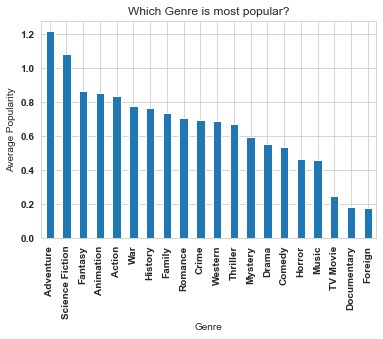

In [591]:
# Plotting the bar graph with the dataset
# Calculating which genre is the most popular via a bar chart.
df_m = df_movie.groupby('genres')['popularity'].mean().sort_values(ascending=False).plot(kind = 'bar')
# Title of the bar graph
pl.title('Which Genre is most popular?')
# Title of the x axis
pl.xlabel('Genre')
# Title of the y axis
pl.ylabel('Average Popularity')

#### The Adventure genre is the most popular genre out of all the genres in movies.

### Research Question 2  Which Genre is the most rated?

Text(0, 0.5, 'Average Rating')

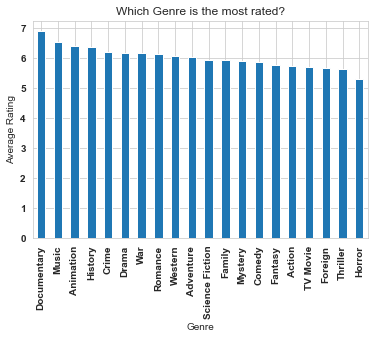

In [592]:
# Plotting the bar graph with the dataset
# Calculating which genre is the most popular via a bar chart.
df_n = df_movie.groupby('genres')['vote_average'].mean().sort_values(ascending=False).plot(kind = 'bar')
# Including the Title of the page.
pl.title('Which Genre is the most rated?')
# Including the title in the x axis.
pl.xlabel('Genre')
# Including the y axis title.
pl.ylabel('Average Rating')

#### Documentary genre is the most rated within the tmdb movie dataset.

### Research Question 3 - What is the relationship between the Voting Average and the Runtime?

Text(0, 0.5, 'Runtime')

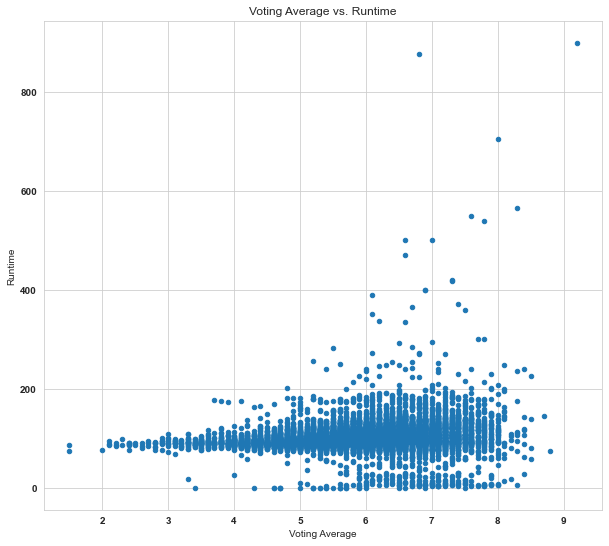

In [593]:
#Using the scatter plot function in order to call a scatterplot and to see the relationship,
# depending on the minutes of each film the ratings based of the duration of the film.

# Using vote_average and runtime in order to see the analyze the relation between the two within a scatterplot diagram.
df_s = df_movie.plot(x='vote_average', y='runtime', kind='scatter', figsize=(10,9)) 
# Title of the Scatterplot diagram
pl.title('Voting Average vs. Runtime')
# x axis label
pl.xlabel('Voting Average')
# y axis label
pl.ylabel('Runtime')

#### We can see there there is a positive corolation when it comes to the relationship between the voting average and runtime.

### Research Question 4 - Which Director made the most revenue?

Text(0, 0.5, 'Revenue')

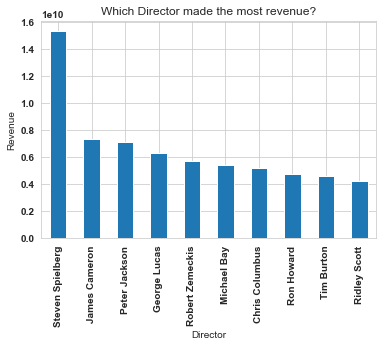

In [594]:
# Plotting the bar graph with the dataset
# Calculating which director has the highest revenue via a bar chart. 
df_o = df_movie.groupby(['director']).sum()['revenue'].nlargest(10)
df_o.plot(kind = 'bar')
# Inputting the title of the bar graph.
pl.title('Which Director made the most revenue?')
# title of the x axis.
pl.xlabel('Director')
# title of the y axis.
pl.ylabel('Revenue')

#### Steven Spielberg has made the most revenue out of all the directors within the dataset.

### Research Question 5 - Which Actor made the most revenue?

Text(0, 0.5, 'Revenue')

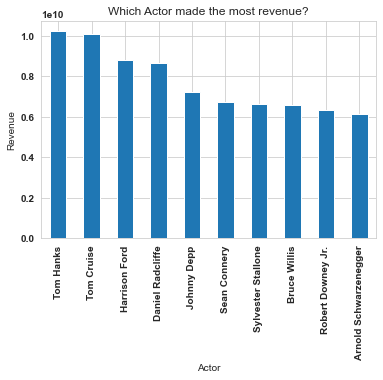

In [595]:
# Plotting the bar graph with the dataset
# Calculating which actor gets paid the most via a bar chart.
df_a = df_movie.groupby(['cast']).sum()['revenue'].nlargest(10)
df_a.plot(kind = 'bar')
# Ttle of the bar graph table
pl.title('Which Actor made the most revenue?')
# x axis title
pl.xlabel('Actor')
# y axis title
pl.ylabel('Revenue')

#### Based of the dataset given fromTMBD movie dataset Tom Hanks and Tom cruise is the most paid actors. 

### Research Question 6 - Which Genre had the highest release of Movies?

In [600]:
# Combining all the genres in order,
#starting with the highest value.

def separate_count(column):
    
# Using the split/string function to split all genres in order to be visible in the pie chart(' | ').    
    split_data = pd.Series(df_movie[column].str.cat(sep = "|").split("|"))
    
    count_data = split_data.value_counts(ascending=False)
    # returned the counted data
    return count_data


# A  list of all the genres.


df_movie.genres.value_counts()

Drama              2443
Comedy             2313
Action             1587
Horror              914
Adventure           585
Thriller            491
Documentary         387
Crime               380
Animation           375
Fantasy             271
Science Fiction     211
Romance             185
Family              142
Mystery             125
Music                96
TV Movie             74
War                  58
History              44
Western              42
Foreign               8
Name: genres, dtype: int64

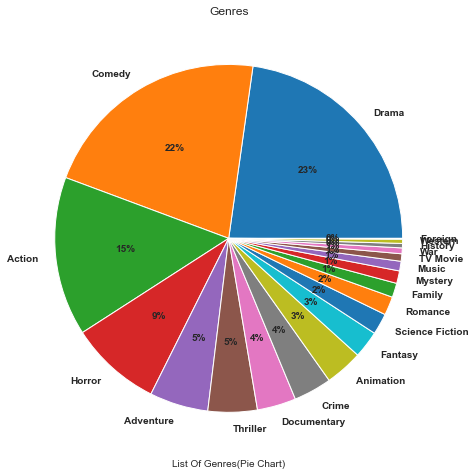

In [602]:
separate_count('genres').plot(kind='pie',figsize=(10,8),autopct="%1.0f%%")
# Font and weight of each genre title.
pl.rc('font', weight='bold')
# Title of the Genre.
pl.title('Genres')
# Keeping the Y axis title blank as not needed.
pl.ylabel('')
# Graph name.
pl.xlabel('List Of Genres(Pie Chart)');

#### Top 3 Genres that are the highest release in movies based of the TMBD database;
##### 1. Drama Genre has 23% (Which makes it the highest release of movies) 
##### 2. Comedy Genre has 22% (The second highest release in movies)
##### 3. Action Genre has 15% (The third highest release in movies).

<a id='conclusions'></a>
## Conclusions

##### Question 1 - Which is the most popular Genre? 
>
>To find out which genre is the most popular we had to calculate the average mean for all genres and creating a bar chart to view all genres and which genre was the most popular, Adventure is the most popular genre on average based of our analysis. 
>
##### Question 2 - Which is the most rated genre? 
>
>We analysed which genre was the most rated by creating a bar chart that gave us a visual presentation of which genre was the most rated out of all the genres. Calculating the mean average I had come to a conclusion based of the analysis process documentary is the most rated Genre.
>
##### Question 3 - What is the relationship between voting average and runtime?
>
>The scatterplot diagram shows a positive corroletion based of the relationship between the voting_average and runtime and shows that there are a lot of plots that's based around between 0 - 100 minutes and then slowly the ratings were based earlier in the movies. Overall the movies rating was based mosting in the upper range and some in the middle range with a few ratings in the lower rated section.
>
##### Question 4 - Which director has made the most revenue? (based of their films) 
>
>To find out which director made the most revenue from their films we calculated the total revenue, Steven Spielberg was the >most successful when it comes to making the most revenue, thihs is based of the tmdb movie dataset.
>
##### Question 5 - Which actor has the most revenue? 
>We found out that Tom Hanks has made the most revenue based of the tmdb movie dataset along with Tom Cruise.
>
##### Question 6 - Which Genre had the highest release of movies?
>
> After listing all the genres that was gathered from the database we had discovered despite the highest rated genre being Documentary and the most popular genre being 'Adventure', the 'Drama' genre is the highest release in movies as presented in a pie chart that shows how much of the genre actually released the most.

## Limitations


> The dataset TMBD movie set that had been provided and analyzed the dataset may not be accurate or up to date as there may be alot more actors or directors along with films that may have not been listed. On that note the budget does not have any currency which makes it less accurate as there may be based of different currencies depending on where the film was taken, this makes it less accurate when we're analyzing based of only within the TMBD movie data set.
>
> The correlations between voting_average and runtime is limited based of the votes that was dependant within the duration of the film and not the overall length of the film, this was not based of the movies becoming a hit yet was dependant within the runtime of the films.

### Reference

https://github.com/hima888/Investigate-a-Dataset-TMDB-Movie-Data-/blob/master/investigate-a-dataset-template.ipynb

https://www.kaggle.com/deepak525/investigate-tmdb-movie-dataset/notebook

https://github.com/YasmeenDos/Investigate-a-Dataset/blob/master/Investigate-TMDb%20(1).ipynb